In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
%%time
df = pd.read_feather('E:registration_workshop/5_exported_cell_registrations/brain1.feather')
df.head()

Wall time: 340 ms


,Class,X,Y,Z,Esr1 (Opal 480): Num Spots,Prg (Opal 520): Num Spots,Prlr (Opal 570): Num Spots,Oxt (Opal 620): Num Spots,Acronym,BrainRegion,Image
0,Positive,3.1363,2.2320,2.9190,21,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
1,Positive,3.1365,2.1999,2.9437,8,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
2,Positive,3.1365,2.1906,2.9545,8,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
3,Positive,3.1365,2.1742,2.9655,16,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
4,Positive,3.1365,2.1650,2.9771,4,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv


## Get Spot Distributions

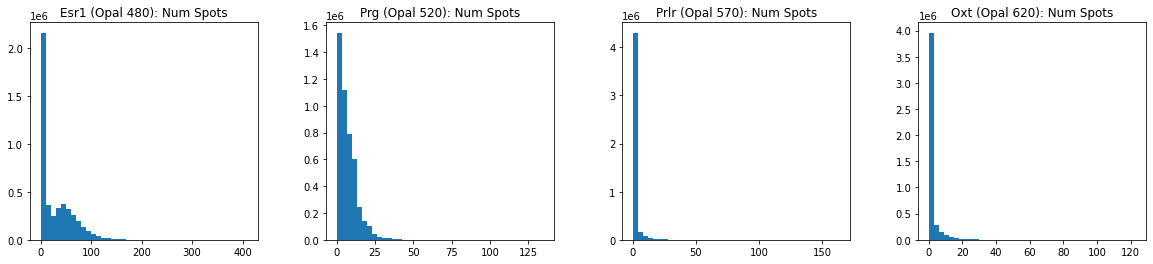

In [3]:
df[['Esr1 (Opal 480): Num Spots', 'Prg (Opal 520): Num Spots', 'Prlr (Opal 570): Num Spots', 'Oxt (Opal 620): Num Spots']].hist(bins=41, grid=False, layout=(1, 4), figsize=(20, 4));

## Organize Data

In [4]:
dfl = df.melt(
    id_vars=['Acronym', 'X', 'Y', 'Z'],
    value_vars=['Esr1 (Opal 480): Num Spots', 'Prg (Opal 520): Num Spots', 'Prlr (Opal 570): Num Spots', 'Oxt (Opal 620): Num Spots'],
    value_name='NumSpots',
    var_name='HormoneReceptor'
)
dfl.head()

,Acronym,X,Y,Z,HormoneReceptor,NumSpots
0,NaN,3.1363,2.2320,2.9190,Esr1 (Opal 480): Num Spots,21
1,NaN,3.1365,2.1999,2.9437,Esr1 (Opal 480): Num Spots,8
2,NaN,3.1365,2.1906,2.9545,Esr1 (Opal 480): Num Spots,8
3,NaN,3.1365,2.1742,2.9655,Esr1 (Opal 480): Num Spots,16
4,NaN,3.1365,2.1650,2.9771,Esr1 (Opal 480): Num Spots,4


## Plots

Wall time: 2.15 s


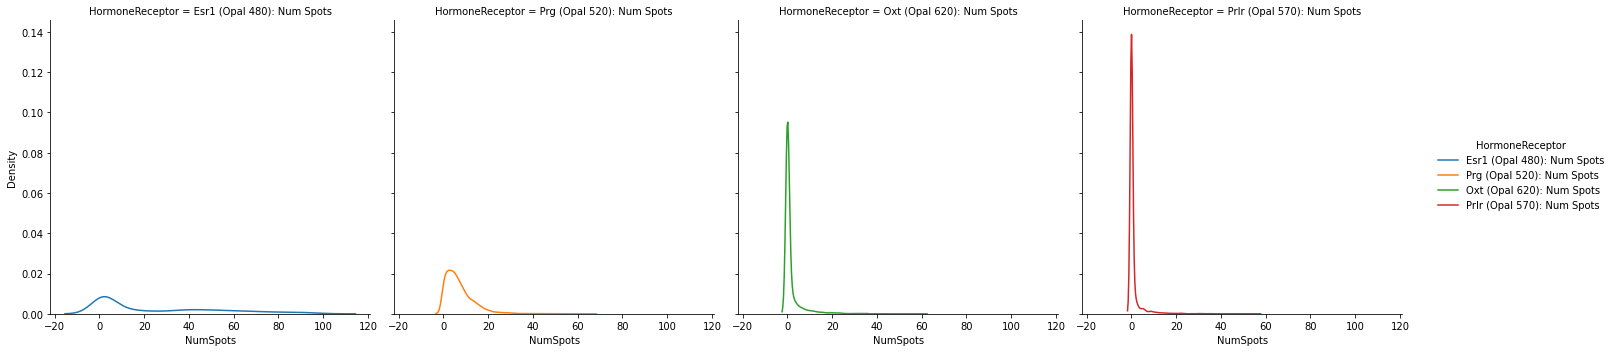

In [6]:
%%time
_ = sns.displot(data=dfl[dfl['NumSpots'] < 100].sample(20000), x='NumSpots', col='HormoneReceptor', hue='HormoneReceptor', kind='kde');

Wall time: 1.2 s


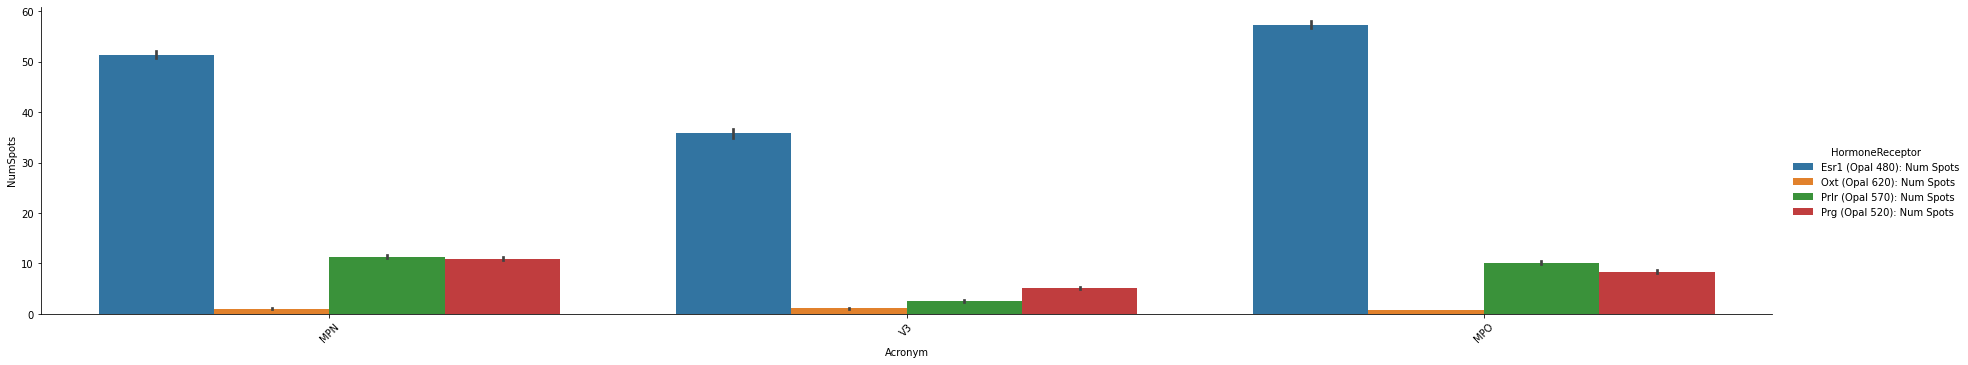

In [30]:
%%time
brain_regions = ['MPO', 'MPN', 'V1', 'V3']
dd = dfl[dfl.Acronym.isin(brain_regions)].astype({'Acronym': str})
# plt.figure(figsize=(15, 3));
sns.catplot(data=dd.sample(50000), x='Acronym', y='NumSpots', hue='HormoneReceptor', height=5, aspect=5, kind='bar');
_ = plt.xticks(rotation=45);